##1. Definição do Problema de Negócio

O Jupyter Notebook pode ser uma ferramenta muito rica que pode contribuir bastante para o desenvolvimento do seu projeto em Ciência de Dados no Programa G. Data da Gerdau. Como uma atividade interessante para a formação do seu notebook, adicione na próxima célula uma figura que ilustre o seu problemas de negócio. 

Segue abaixo o comando para acrescentar uma imagem em uma **CÉLULAR DO TIPO TEXTO** no seu notebook. A próxima célula apresenta um exemplo de comando que mostra uma imagem qualquer (randômica) extraída do site unplash. 

**TODO #1:**
ADICIONE UMA IMAGEM QUE ILUSTRE O PROBLEMA QUE O SEU PROJETO DE DATA SCIENCE DEVE RESOLVER DENTRO DO PROGRAMA ELITA DOS DADOS. 


![Titulo da Imagem](https://source.unsplash.com/random)

A **Gerdau** identificou a necessidade de maior acurácia com relação ao processo de fabricação de produtos planos. Esta é uma das principais fontes de receita da empresa e está passando atualmente por uma revisão do seu processo de fabricação. Além disso existe a determinação por parte do CEO da busca constante por inovação associado ao seu processo produtivo.

**Problemática:** A não identificação de falhas durante o processo de  fabricação de produtos planos está causando prejuízos financeiros à fábrica. 

**Possível solução:** A partir da identificação de um conjunto de dados históricos relacionados a fabricação de produtos planos com suas respectivas classificações (tipos de falhas), seria possível treinar um modelo de Aprendizagem de Máquina para predizer a probabilidade de ocorrência de um tipo de falha antes que a falha efetivamente ocorra (ainda no início do processo produtivo).


## 2.Importando as bibliotecas necessárias


In [ ]:
# Bibliotecas de manipulação de dados
import numpy as np
import pandas as pd

# Separando o dataset em treinamento e teste
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Modelos para Aprendizagem de Máquina
from sklearn.linear_model import LogisticRegression

# TODO #2: Além da importação do modelo de LogisticRegression do sklearn acima adicione também a importação 
# do modelo de Arvore de Decisão  - DecisionTree
from sklearn.tree import DecisionTreeClassifier

# Métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score

# Bibliotecas de vizualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para ignorar warnings de bibliotecas deprecated
import warnings
warnings.filterwarnings('ignore')

# Verificando as versões das bibliotecas pandas de numpy
print(pd.__version__)
print(np.__version__)

# Alterando as configurações de apresentação de linhas e colunas 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

1.1.5
1.19.5



## 3. Realizando a carga dos dados


In [ ]:
# TODO: Realizar a carga dos dados do arquivo steel_faults_with_target.csv
# steel = pd.read_csv('/content/steel_faults_with_target.csv')

# TODO 3: Realizar a carga dos dados do arquivo steel_faults_with_target.csv

import boto3

import awswrangler as wr

boto3.setup_default_session(region_name="us-east-2")

wr.catalog.get_table_location(database='db_gdata_2021', table='steel')

steel=wr.s3.read_csv('s3://gerdau-analytics/gdata/steel/')

In [ ]:
steel.head()

,TARGET,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,Pastry,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,1687.0,1.0,0.0,80.0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,Pastry,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,1687.0,1.0,0.0,80.0,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,Pastry,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,1623.0,1.0,0.0,100.0,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,Pastry,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,1353.0,0.0,1.0,290.0,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,Pastry,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,1353.0,0.0,1.0,185.0,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


### Tratamento para padronização das colunas do dataset

In [ ]:
steel.columns

Index(['TARGET', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [ ]:
steel.columns = steel.columns.str.upper()
steel.columns

Index(['TARGET', 'X_MINIMUM', 'X_MAXIMUM', 'Y_MINIMUM', 'Y_MAXIMUM',
       'PIXELS_AREAS', 'X_PERIMETER', 'Y_PERIMETER', 'SUM_OF_LUMINOSITY',
       'MINIMUM_OF_LUMINOSITY', 'MAXIMUM_OF_LUMINOSITY', 'LENGTH_OF_CONVEYER',
       'TYPEOFSTEEL_A300', 'TYPEOFSTEEL_A400', 'STEEL_PLATE_THICKNESS',
       'EDGES_INDEX', 'EMPTY_INDEX', 'SQUARE_INDEX', 'OUTSIDE_X_INDEX',
       'EDGES_X_INDEX', 'EDGES_Y_INDEX', 'OUTSIDE_GLOBAL_INDEX', 'LOGOFAREAS',
       'LOG_X_INDEX', 'LOG_Y_INDEX', 'ORIENTATION_INDEX', 'LUMINOSITY_INDEX',
       'SIGMOIDOFAREAS'],
      dtype='object')

## 4. Análise Exploratória dos Dados

In [ ]:
# TODO: Apresentar informações estatísticas descritivas do dataset
steel.describe().T

,count,mean,std,min,25%,50%,75%,max
X_MINIMUM,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_MAXIMUM,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_MINIMUM,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_MAXIMUM,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
PIXELS_AREAS,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_PERIMETER,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_PERIMETER,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
SUM_OF_LUMINOSITY,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
MINIMUM_OF_LUMINOSITY,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
MAXIMUM_OF_LUMINOSITY,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


### Explorando alguns gráficos


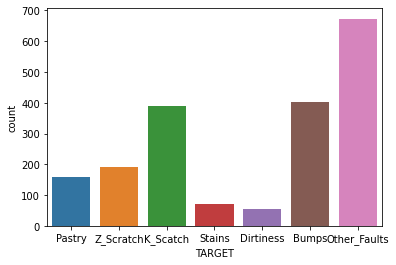

In [ ]:
# Usando seaborn
sns.countplot(data = steel, x='TARGET')

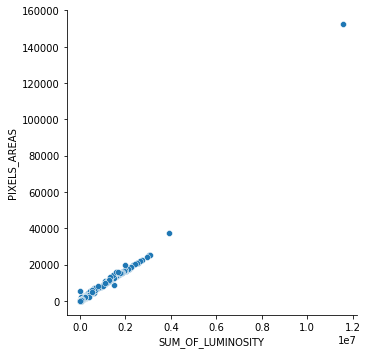

In [ ]:
# TODO #3 - Usando seaborn (por exemplo, usar o método relplot) mostrar um gráfico 
# que apresente a relação entre as variáveis SUM_OF_LUMINOSITY e PIXELS_AREAS.

sns.relplot(data=steel, x="SUM_OF_LUMINOSITY", y="PIXELS_AREAS");

In [ ]:
from collections import Counter

counter = Counter(steel.loc[:, 'TARGET'])
print(counter)

Counter({'Other_Faults': 673, 'Bumps': 402, 'K_Scatch': 391, 'Z_Scratch': 190, 'Pastry': 158, 'Stains': 72, 'Dirtiness': 55})


In [ ]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TARGET                 1941 non-null   object 
 1   X_MINIMUM              1941 non-null   float64
 2   X_MAXIMUM              1941 non-null   float64
 3   Y_MINIMUM              1941 non-null   float64
 4   Y_MAXIMUM              1941 non-null   float64
 5   PIXELS_AREAS           1941 non-null   float64
 6   X_PERIMETER            1941 non-null   float64
 7   Y_PERIMETER            1941 non-null   float64
 8   SUM_OF_LUMINOSITY      1941 non-null   float64
 9   MINIMUM_OF_LUMINOSITY  1941 non-null   float64
 10  MAXIMUM_OF_LUMINOSITY  1941 non-null   float64
 11  LENGTH_OF_CONVEYER     1941 non-null   float64
 12  TYPEOFSTEEL_A300       1941 non-null   float64
 13  TYPEOFSTEEL_A400       1941 non-null   float64
 14  STEEL_PLATE_THICKNESS  1941 non-null   float64
 15  EDGE

## 5. Identificando valores ausentes - Missing Values 

In [ ]:
#Identifcando valores ausentes 
print(steel.isnull().sum())

TARGET                   0
X_MINIMUM                0
X_MAXIMUM                0
Y_MINIMUM                0
Y_MAXIMUM                0
PIXELS_AREAS             0
X_PERIMETER              0
Y_PERIMETER              0
SUM_OF_LUMINOSITY        0
MINIMUM_OF_LUMINOSITY    0
MAXIMUM_OF_LUMINOSITY    0
LENGTH_OF_CONVEYER       0
TYPEOFSTEEL_A300         0
TYPEOFSTEEL_A400         0
STEEL_PLATE_THICKNESS    0
EDGES_INDEX              0
EMPTY_INDEX              0
SQUARE_INDEX             0
OUTSIDE_X_INDEX          0
EDGES_X_INDEX            0
EDGES_Y_INDEX            0
OUTSIDE_GLOBAL_INDEX     0
LOGOFAREAS               0
LOG_X_INDEX              0
LOG_Y_INDEX              0
ORIENTATION_INDEX        0
LUMINOSITY_INDEX         0
SIGMOIDOFAREAS           0
dtype: int64


##6. Separando as variáveis dependentes das variáveis independentes

In [ ]:
X = steel.loc[:, steel.columns != 'TARGET'] # variáveis independentes
y = steel['TARGET'] #target ou variável dependente 

print(X.shape)
print(y.shape)

print(X)
print(y)

(1941, 27)
(1941,)
      X_MINIMUM  X_MAXIMUM  ...  LUMINOSITY_INDEX  SIGMOIDOFAREAS
0          42.0       50.0  ...           -0.2913          0.5822
1         645.0      651.0  ...           -0.1756          0.2984
2         829.0      835.0  ...           -0.1228          0.2150
3         853.0      860.0  ...           -0.1568          0.5212
4        1289.0     1306.0  ...           -0.1992          1.0000
...         ...        ...  ...               ...             ...
1936      249.0      277.0  ...            0.0026          0.7254
1937      144.0      175.0  ...           -0.0582          0.8173
1938      145.0      174.0  ...            0.0052          0.7079
1939      137.0      170.0  ...           -0.0171          0.9919
1940     1261.0     1281.0  ...           -0.1139          0.5296

[1941 rows x 27 columns]
0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Fa

In [ ]:
#Separação do dataset em treinamento e tests
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=42)

## 7. Feature Scaling

Uma das transformações mais importantes que você precisa aplicar aos seus dados é o dimensionamento de recursos (feature scaling). Com poucas exceções, os algoritmos de Aprendizado de Máquina não apresentam bom desempenho quando os atributos numéricos de entrada possuem escalas muito diferentes.

In [ ]:
transformator = StandardScaler()
X_train = transformator.fit_transform(X_train)
X_test = transformator.fit_transform(X_test)

display(X_train)
display(X_test)

array([[-0.98092525, -0.84116281,  3.63697701, ..., -1.47692834,
        -0.15336504,  1.24210091],
       [ 1.08237115,  1.05790621, -0.60257863, ...,  1.41539032,
        -0.07050487,  0.20775849],
       [ 0.90144777,  0.87627367, -0.18061767, ...,  1.11870079,
        -0.4744482 ,  0.55075902],
       ...,
       [ 0.06227125, -0.01574386,  0.33237375, ...,  0.88567421,
         0.2098387 , -1.09718641],
       [-0.69799189, -0.80887258,  0.8642272 , ...,  0.00995506,
         0.08623895, -1.14525396],
       [ 0.46068763,  0.42824677, -0.47024282, ...,  0.33190766,
         0.03514184,  0.73739166]])

array([[ 1.09730297,  1.1249009 , -0.27170494, ...,  0.52889422,
        -0.33126476,  1.17587738],
       [ 1.96912755,  2.0350291 , -0.71650963, ...,  0.97855699,
        -1.44715997,  1.17587738],
       [ 2.05535196,  2.07095521,  0.1961161 , ...,  0.19106266,
        -1.16643961, -0.98045453],
       ...,
       [-1.00274041, -1.08455506,  0.59689457, ..., -0.2586001 ,
         0.10505852,  0.8717272 ],
       [ 1.40004645,  1.4163016 , -0.43301621, ..., -1.66740056,
         0.76811749, -1.04488329],
       [ 0.70450288,  0.67183269,  0.97588135, ..., -0.88808901,
         1.03105466, -1.00976671]])

In [ ]:
# Criando uma coleção (lista) de classificadores 
classifiers = []

## 8. Criando o classificador de Logistic Regression para o conjunto de treinamento 


In [ ]:
# TODO: Instanciar um classificador para Regressão Logística (Logistic Regression)
classifier = LogisticRegression(random_state=0, solver='newton-cg')

# Treinando o modelo
classifier.fit(X_train, y_train)

classifiers.append(classifier)

# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Prevendo alguns valores com o conjunto de dados de teste

#Sem indicação de probabilidade
y_pred = classifier.predict(X_test) 

In [ ]:
classifier = DecisionTreeClassifier(random_state=0)

# Treinando o modelo
classifier.fit(X_train, y_train)

# Adicionando o novo classificador a lista de classificadores
classifiers.append(classifier)

In [ ]:
# Prevendo alguns valores com o conjunto de dados de teste

#Sem indicação de probabilidade
y_pred = classifier.predict(X_test) 

## 9. Verificando a acurácia do modelo utilizado

Precisão é uma métrica para avaliar modelos de classificação. Informalmente, a precisão é a fração de previsões que nosso modelo acertou. 

In [ ]:
# Acurácia do Logistic Regression e Decision Tree

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print()
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7272727272727273

DecisionTreeClassifier 0.40308747855917665


## TODO: Responder a pergunta: 
**Qual classificador teve melhor performance, se observarmos somente a métrica da acurácia?**

LogisticRegression 0.7272727272727273
